In [2]:
# POde pular essa etapa se os pacotes já estão instalados
!pip install numpy
!pip install scikit-learn
!pip install scikit-image
!pip install librosa
!pip install tqdm
!pip install matplotlib
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 803.9 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 17.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 886.1 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 25.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 4.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 7.2 MB/s eta 0:00:00
  Using cached pycparser-2.22-py3-none-any.wh

In [1]:
#ref: https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential, load_model
from keras.layers import GRU, LSTM, Conv2D, MaxPooling2D, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation, TimeDistributed
from PIL import Image
#to play audio
import IPython.display as ipd


2024-05-16 21:30:07.955027: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 21:30:07.969276: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-16 21:30:08.133046: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 21:30:17.128851: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Nesse caso você precisa ter no seu diretório uma pasta com o mesmo nome da variável base_dir
base_dir = "clean_audioset"
tipo_espectrograma = "L3M"

# E dentro da pasta audioset, você precisa de 3 pastas: carros, motocicletas e motosserras contendo os áudios
audio_carro_path = base_dir + "/carros/"
audio_moto_path = base_dir + "/motocicletas/"  # caminho onde estão os arquivos de audio
audio_serra_path = base_dir + "/motosserras/"

spec_base_path = base_dir + f"/{tipo_espectrograma}"
spec_carro_path = os.path.join(spec_base_path, "carros")
spec_moto_path = os.path.join(spec_base_path, "motocicletas")
spec_serra_path = os.path.join(spec_base_path, "motosserras")
 
os.makedirs(spec_base_path, exist_ok=True)
os.makedirs(spec_carro_path, exist_ok=True)
os.makedirs(spec_moto_path, exist_ok=True)
os.makedirs(spec_serra_path, exist_ok=True)

FILE_FORMAT = "png"
TAM_IMAGEM = 128


In [3]:
audio_carro_clips = sorted(os.listdir(audio_carro_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_carro_path}= ",len(audio_carro_clips))

audio_moto_clips = sorted(os.listdir(audio_moto_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_moto_path}= ",len(audio_moto_clips))

audio_serra_clips = sorted(os.listdir(audio_serra_path))[:50]
print(f"Número de arquivos .wav na pasta {audio_serra_path}= ",len(audio_serra_clips))

Número de arquivos .wav na pasta clean_audioset/carros/=  50
Número de arquivos .wav na pasta clean_audioset/motocicletas/=  50
Número de arquivos .wav na pasta clean_audioset/motosserras/=  50


In [4]:
#aqui está selecionando o primeiro arquivo da lista, pode ser feito um for para pegar todos de uma vez
#verificar esse sample rate
x_carro, sr_carro = librosa.load(audio_carro_path+audio_carro_clips[0]) 
x_moto, sr_moto = librosa.load(audio_moto_path+audio_moto_clips[4]) 
x_serra, sr_serra = librosa.load(audio_serra_path+audio_serra_clips[6]) 

print(type(x_carro), type(sr_carro))
print(x_carro.shape, sr_carro)

print(type(x_moto), type(sr_moto))
print(x_moto.shape, sr_moto)

print(type(x_serra), type(sr_serra))
print(x_serra.shape, sr_serra)

<class 'numpy.ndarray'> <class 'int'>
(220676,) 22050
<class 'numpy.ndarray'> <class 'int'>
(114308,) 22050
<class 'numpy.ndarray'> <class 'int'>
(1323000,) 22050


TESTE L3M

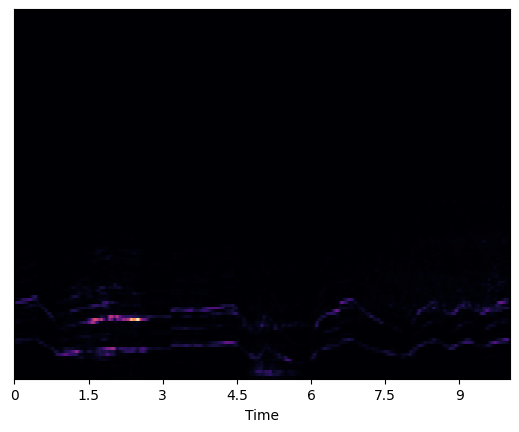

In [47]:
y, sr = librosa.load(audio_carro_path+audio_carro_clips[0])
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=4096)
S = spect #librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(S, sr=sr, x_axis='time')

array([[ 2.3333702 ,  2.2111187 ,  1.9502838 , ...,  2.829588  ,
         2.8199348 ,  2.6660519 ],
       [ 2.7883518 ,  2.8257976 ,  2.7315478 , ...,  3.0797448 ,
         2.8822894 ,  2.5906303 ],
       [ 2.2996764 ,  2.3954709 ,  2.3880734 , ...,  3.0246298 ,
         2.9744914 ,  2.7918708 ],
       ...,
       [-0.7220276 , -0.70706636, -0.7849533 , ...,  0.43206635,
         0.46068496,  0.33981436],
       [-0.97190857, -0.9865738 , -1.1017883 , ...,  0.18595771,
         0.17219505, -0.01624451],
       [-1.2546539 , -1.3606857 , -1.7308334 , ..., -0.7746109 ,
        -0.79508746, -1.0061264 ]], dtype=float32)

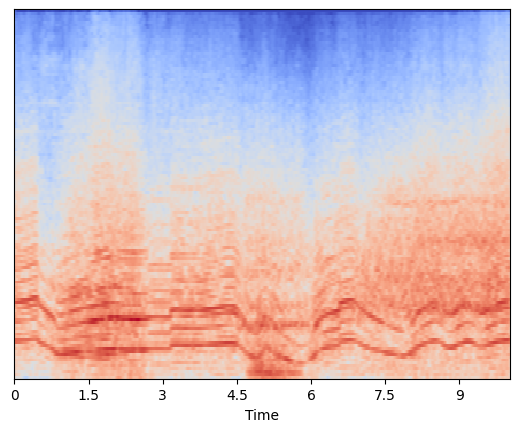

In [48]:
S_dB = (librosa.power_to_db(S, ref=np.max) + 60) / 10
librosa.display.specshow(S_dB, sr=sr, x_axis='time')
S_dB

array([[ 0.14745809,  0.1416152 ,  0.12798664, ...,  0.16839299,
         0.16802195,  0.16192934],
       [ 0.16679907,  0.16824745,  0.16456439, ...,  0.17759086,
         0.17039658,  0.15881355],
       [ 0.14587887,  0.1503099 ,  0.14997411, ...,  0.17563024,
         0.17381535,  0.16693601],
       ...,
       [-1.75      , -1.75      , -1.75      , ..., -0.0356502 ,
        -0.02868681, -0.06172738],
       [-1.75      , -1.75      , -1.75      , ..., -0.12718427,
        -0.13553266, -1.75      ],
       [-1.75      , -1.75      , -1.75      , ..., -1.75      ,
        -1.75      , -1.75      ]], dtype=float32)

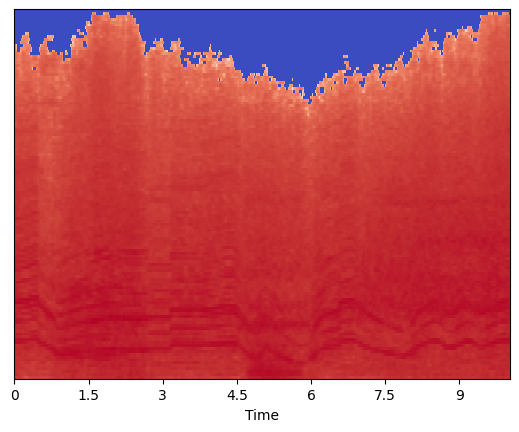

In [49]:
S_linha_dB =  (librosa.power_to_db(S_dB, ref=np.max) + 10) / 40
librosa.display.specshow(S_linha_dB, sr=sr, x_axis='time')
S_linha_dB

array([[ 5.7707286,  5.75317  ,  5.7092247, ...,  5.828384 ,  5.827426 ,
         5.811385 ],
       [ 5.8242536,  5.828008 ,  5.818396 , ...,  5.8514805,  5.833521 ,
         5.8029475],
       [ 5.7660522,  5.7790475,  5.778076 , ...,  5.846659 ,  5.8421483,
         5.82461  ],
       ...,
       [-2.       , -2.       , -2.       , ..., -2.       , -2.       ,
        -2.       ],
       [-2.       , -2.       , -2.       , ..., -2.       , -2.       ,
        -2.       ],
       [-2.       , -2.       , -2.       , ..., -2.       , -2.       ,
        -2.       ]], dtype=float32)

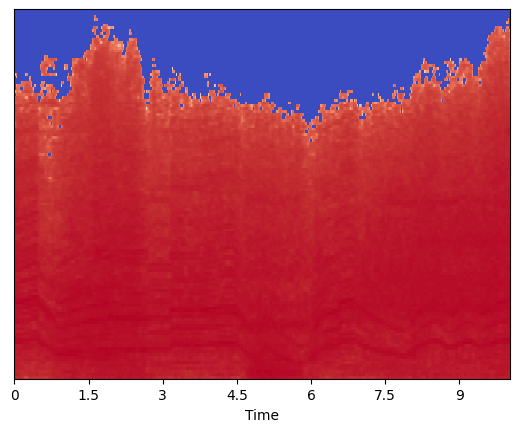

In [50]:
S_2linhas_dB =  (librosa.power_to_db(S_linha_dB, ref=np.max) + 60) / 10
librosa.display.specshow(S_2linhas_dB, sr=sr, x_axis='time')
S_2linhas_dB

# Salvar valores de espectrograma
 - Pule esse passo se os arquivos já estiverem na pasta

In [65]:
##converter o audio para espectrograma:255
## é nesse amplitude_to_dB que ele está convertendo para pressão sonora. Podemos explorar outras ponderações aqui. Se não tiver implementado, podemos implementar.
def gerar_espectrograma(y, sr):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=4096)
    S_dB = (librosa.power_to_db(S, ref=np.max) + 60) / 10
    S_linha_dB =  (librosa.power_to_db(S_dB, ref=np.max) + 10) / 40
    S_2linhas_dB =  (librosa.power_to_db(S_linha_dB, ref=np.max) + 60) / 10
    return S_2linhas_dB


def cortar_espectrograma(spectrogram, largura_janela=TAM_IMAGEM, altura_janela=TAM_IMAGEM):
    altura_spec = spectrogram.shape[0]+1
    largura_spec = spectrogram.shape[1]
    spectrogram_slices = []

    print("Tamanho espectrograma:",spectrogram.shape )

    for h in range(altura_janela, altura_spec, altura_janela):
        for w in range(largura_janela, largura_spec, largura_janela):
            slice = spectrogram[h-altura_janela : h,   # largura
                                w-largura_janela : w,  # altura
                                np.newaxis]
            spectrogram_slices.append(slice)
            
    return spectrogram_slices    
    

In [61]:

# Salvar espectrogramas na pasta específica (carros, serras etc)
def salvar_espectrogtramas (audio_clips, audio_path, spectrogram_path, audios_por_arquivo=50):
    numero_audios = len(audio_clips)
    num_arquivo = 1

    spectrogram_values = []
    
    for i, audio_name in enumerate(audio_clips):
        y, sr = librosa.load( os.path.join(audio_path, audio_name) )
        audio_name = audio_name.replace(".mp3", "")

        fullpath = os.path.join(spectrogram_path, audio_name)
        try:
            mel_spec = gerar_espectrograma(y, sr)
            mel_spec = 255 * (mel_spec - mel_spec.min()) / (mel_spec.max() - mel_spec.min())
            mel_spec = np.flip(mel_spec, axis=0) # put low frequencies at the bottom in image
            #fft_spec = 255 - fft_spec
            mel_spec_slices = cortar_espectrograma(mel_spec)
            
            # Salva o arquivo e começa o próximo
            for j in range(len(mel_spec_slices)):
                full_filename = fullpath + f"_{j+1}.{FILE_FORMAT}"
                spec_save = mel_spec_slices[j][:, :, 0]

                if FILE_FORMAT == "csv":
                    np.savetxt(full_filename, spec_save, delimiter=",")
                else:
                    im = Image.fromarray(spec_save).convert("L")
                    im.save(full_filename)

            print("Arquivo %s salvo com sucesso." % full_filename)
                
        except Exception as e:
            print( "Erro ao salvar %s: %s." % (fullpath, e) )


salvar_espectrogtramas(audio_carro_clips, audio_carro_path, spec_carro_path)

salvar_espectrogtramas(audio_moto_clips, audio_moto_path, spec_moto_path)

salvar_espectrogtramas(audio_serra_clips, audio_serra_path, spec_serra_path)


Tamanho espectrograma: (128, 432)
Arquivo clean_audioset/L3M/carros/(HD) - Forza 4 - Top Gear - Car Test - 1990 Lotus Carlton-0GZbu00-aMY_3.png salvo com sucesso.
Tamanho espectrograma: (128, 431)
Arquivo clean_audioset/L3M/carros/1968 Chevy Camaro - V8 327 - MUSCLECAR SOUND - restauriert-1ddvRm8MURI_3.png salvo com sucesso.
Tamanho espectrograma: (128, 431)
Arquivo clean_audioset/L3M/carros/1995 Toyota Supra FOR SALE-2-1wY_Ndtgw_3.png salvo com sucesso.
Tamanho espectrograma: (128, 431)
Arquivo clean_audioset/L3M/carros/2013 Porsche 911 Carrera Start Up and Review 3.4 L Horizontally Opposed⧸6 Cylinder-9BzZvj5W09s_3.png salvo com sucesso.
Tamanho espectrograma: (128, 388)
Arquivo clean_audioset/L3M/carros/95 Mustang drag car start up-1sjKon7lrLY_3.png salvo com sucesso.
Tamanho espectrograma: (128, 431)
Arquivo clean_audioset/L3M/carros/99 Trans Am WS6 - Donuts, Take-Offs, 110MPH!-G4Rp68qV_aw_3.png salvo com sucesso.
Tamanho espectrograma: (128, 388)
Arquivo clean_audioset/L3M/carros/A

# Treinamento e teste de rede neural

In [66]:
# Carregar espectrogramas com uma CNN e classificar entre "motosserras e não motosserras"

espectrogramas_carro = sorted(os.listdir(spec_carro_path))
espectrogramas_moto = sorted(os.listdir(spec_moto_path))
espectrogramas_serra = sorted(os.listdir(spec_serra_path))

spectrogram_list = []
labels = []

def carregar_espectrograma(full_filename):
    if FILE_FORMAT == "png":
        return np.asarray(Image.open(full_filename))
    else:
        return np.loadtxt(full_filename, delimiter=",")


def adicionar_rotulos_spec(espectrogramas, spec_path, label):
    for filename in espectrogramas:
        full_filename = os.path.join(spec_path, filename)  

        spectrogram = carregar_espectrograma(full_filename)
        spectrogram_list.append(spectrogram)
        # 0 corresponde aos carros e motos
        labels.append(label)


adicionar_rotulos_spec(espectrogramas_carro, spec_carro_path, 0)
adicionar_rotulos_spec(espectrogramas_moto, spec_moto_path, 0)
adicionar_rotulos_spec(espectrogramas_serra, spec_serra_path, 1)


print("Número de espectrogramas carros: ", len(espectrogramas_carro))
print("Número de espectrogramas motos: ", len(espectrogramas_moto))
print("Número de espectrogramas motosserras: ", len(espectrogramas_serra))


spectrogram_np = np.array(spectrogram_list) / 255

spectrogram_np = spectrogram_np.reshape(
    (spectrogram_np.shape[0], spectrogram_np.shape[1], spectrogram_np.shape[2], 1)
)

labels_np = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    spectrogram_np, labels_np, test_size=0.1  # , random_state=42
)

print("Amostras treinamento:", len(X_train))
print("Amostras teste:", len(X_test))

Número de espectrogramas carros:  143
Número de espectrogramas motos:  146
Número de espectrogramas motosserras:  275
Amostras treinamento: 507
Amostras teste: 57


In [68]:
## Initialize the model
#model = Sequential()
#
## Add convolutional layers
#model.add(Conv2D(32, (3, 3), input_shape=X_train[0].shape))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
#model.add(Conv2D(128, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#
## Flatten the output before fully connected layers
#model.add(Flatten())
#
## Fully connected layer with dropout
#model.add(Dense(256))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#
## Output layer with softmax activation
#model.add(Dense(1, activation='sigmoid')) # Binary classification
#
## Compile the model
#model.compile(loss='binary_crossentropy',
#              optimizer='adam',
#              metrics=['accuracy'])
## Print model summaryImage.open
#model.summary()
#model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)
#
#model.save(f"checkpoints/{tipo_espectrograma}.keras")
#
model = Sequential()

model.add(Conv2D(16, 3, activation='relu', use_bias=True, bias_initializer='zeros', input_shape=X_train[0].shape))
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu', use_bias=True, bias_initializer='zeros'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Binary classification
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Print model summaryImage.open
model.summary()
model.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=16)

model.save(f"checkpoints/{tipo_espectrograma}.keras")

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,337 (6.34 MB)

 Trainable params: 1,662,337 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 27s 600ms/step - accuracy: 0.5541 - loss: 0.7730 - val_accuracy: 0.5000 - val_loss: 0.9817
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 19s 557ms/step - accuracy: 0.7023 - loss: 0.5605 - val_accuracy: 0.6863 - val_loss: 0.5451
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 557ms/step - accuracy: 0.7466 - loss: 0.4911 - val_accuracy: 0.6961 - val_loss: 0.5168
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 571ms/step - accuracy: 0.7563 - loss: 0.4451 - val_accuracy: 0.7157 - val_loss: 0.5715
Epoch 5/20


In [60]:
model = load_model(f"checkpoints/{tipo_espectrograma}.keras")
y_pred = model.predict(X_test)[:, 0]
y_pred = np.round(y_pred)
acc = len(np.where(y_pred == y_test)[0]) / len(y_test)
print("Acurácia:", acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
Acurácia: 0.8275862068965517
